<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_4_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n20.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.172075,96.675597,65.342897,1.976875,262.167444,259.992322,2.175121
1,0.0,1.0,41.213192,58.825571,67.896717,0.843756,178.779235,178.268425,0.510809
2,0.0,2.0,42.470038,98.020759,83.564878,-2.069068,231.986607,234.459730,-2.473123
3,0.0,3.0,75.852006,23.356844,99.051197,-0.488451,207.771596,208.780771,-1.009175
4,0.0,4.0,99.881057,39.151046,44.231394,0.594424,193.857920,192.869999,0.987921
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,50.586678,46.209756,80.065603,-2.939015,183.923022,187.661354,-3.738332
19996,999.0,16.0,64.708982,80.441863,70.608345,-3.436043,222.323148,224.263967,-1.940819
19997,999.0,17.0,74.929955,86.643945,61.557462,5.640001,238.771363,231.195726,7.575636
19998,999.0,18.0,60.706866,34.670125,85.789559,-0.151401,191.015149,193.299246,-2.284097


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.172075,96.675597,65.342897,1.976875,262.167444,259.992322,2.175121
1,0.0,1.0,41.213192,58.825571,67.896717,0.843756,178.779235,178.268425,0.510809
2,0.0,2.0,42.470038,98.020759,83.564878,-2.069068,231.986607,234.459730,-2.473123
3,0.0,3.0,75.852006,23.356844,99.051197,-0.488451,207.771596,208.780771,-1.009175
4,0.0,4.0,99.881057,39.151046,44.231394,0.594424,193.857920,192.869999,0.987921
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,50.586678,46.209756,80.065603,-2.939015,183.923022,187.661354,-3.738332
19996,999.0,16.0,64.708982,80.441863,70.608345,-3.436043,222.323148,224.263967,-1.940819
19997,999.0,17.0,74.929955,86.643945,61.557462,5.640001,238.771363,231.195726,7.575636
19998,999.0,18.0,60.706866,34.670125,85.789559,-0.151401,191.015149,193.299246,-2.284097


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.172075  96.675597  65.342897  ...  262.167444  259.992322  2.175121
      1.0    41.213192  58.825571  67.896717  ...  178.779235  178.268425  0.510809
      2.0    42.470038  98.020759  83.564878  ...  231.986607  234.459730 -2.473123
      3.0    75.852006  23.356844  99.051197  ...  207.771596  208.780771 -1.009175
      4.0    99.881057  39.151046  44.231394  ...  193.857920  192.869999  0.987921
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   50.586678  46.209756  80.065603  ...  183.923022  187.661354 -3.738332
      16.0   64.708982  80.441863  70.608345  ...  222.323148  224.263967 -1.940819
      17.0   74.929955  86.643945  61.557462  ...  238.771363  231.195726  7.575636
      18.0   60.706866  34.670125  85.789559  ...  191.015149  193.299246 -2.284097
      19.0   51.812298  72.602019  75.837560  ...  212.748001  209.089157  3.658844

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.172075  96.675597  65.342897  ...  262.167444  259.992322  2.175121
      1.0    41.213192  58.825571  67.896717  ...  178.779235  178.268425  0.510809
      2.0    42.470038  98.020759  83.564878  ...  231.986607  234.459730 -2.473123
      3.0    75.852006  23.356844  99.051197  ...  207.771596  208.780771 -1.009175
      4.0    99.881057  39.151046  44.231394  ...  193.857920  192.869999  0.987921
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   50.586678  46.209756  80.065603  ...  183.923022  187.661354 -3.738332
      16.0   64.708982  80.441863  70.608345  ...  222.323148  224.263967 -1.940819
      17.0   74.929955  86.643945  61.557462  ...  238.771363  231.195726  7.575636
      18.0   60.706866  34.670125  85.789559  ...  191.015149  193.299246 -2.284097
      19.0   51.812298  72.602019  75.837560  ...  212.748001  209.089157  3.658844

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,88.172075,96.675597,65.342897,1.976875,262.167444,259.992322,2.175121
1,0.0,1.0,41.213192,58.825571,67.896717,0.843756,178.779235,178.268425,0.510809
2,0.0,2.0,42.470038,98.020759,83.564878,-2.069068,231.986607,234.459730,-2.473123
3,0.0,3.0,75.852006,23.356844,99.051197,-0.488451,207.771596,208.780771,-1.009175
4,0.0,4.0,99.881057,39.151046,44.231394,0.594424,193.857920,192.869999,0.987921
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,50.586678,46.209756,80.065603,-2.939015,183.923022,187.661354,-3.738332
19996,999.0,16.0,64.708982,80.441863,70.608345,-3.436043,222.323148,224.263967,-1.940819
19997,999.0,17.0,74.929955,86.643945,61.557462,5.640001,238.771363,231.195726,7.575636
19998,999.0,18.0,60.706866,34.670125,85.789559,-0.151401,191.015149,193.299246,-2.284097


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    88.172075  96.675597  65.342897  ...  262.167444  259.992322  2.175121
      1.0    41.213192  58.825571  67.896717  ...  178.779235  178.268425  0.510809
      2.0    42.470038  98.020759  83.564878  ...  231.986607  234.459730 -2.473123
      3.0    75.852006  23.356844  99.051197  ...  207.771596  208.780771 -1.009175
      4.0    99.881057  39.151046  44.231394  ...  193.857920  192.869999  0.987921
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   50.586678  46.209756  80.065603  ...  183.923022  187.661354 -3.738332
      16.0   64.708982  80.441863  70.608345  ...  222.323148  224.263967 -1.940819
      17.0   74.929955  86.643945  61.557462  ...  238.771363  231.195726  7.575636
      18.0   60.706866  34.670125  85.789559  ...  191.015149  193.299246 -2.284097
      19.0   51.812298  72.602019  75.837560  ...  212.748001  209.089157  3.658844

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

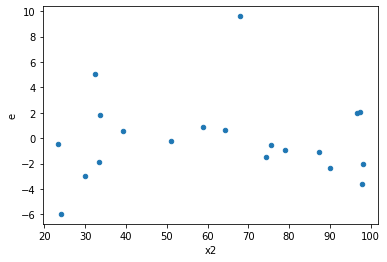

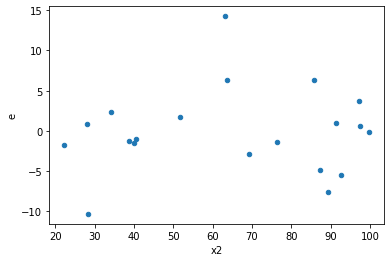

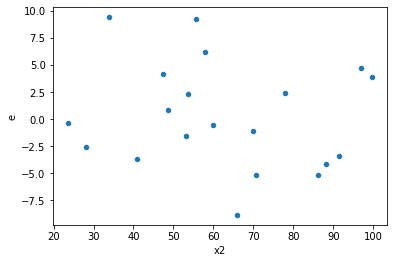

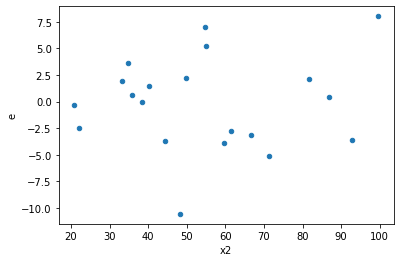

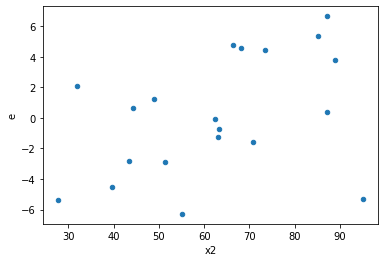

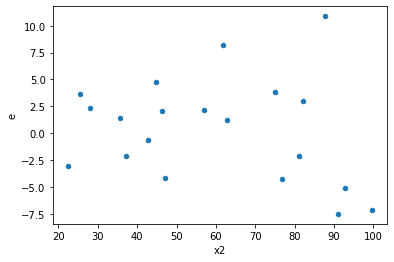

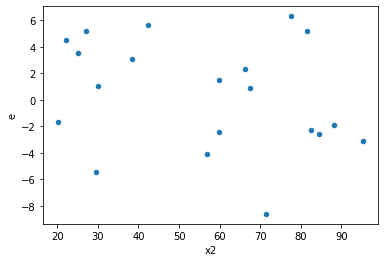

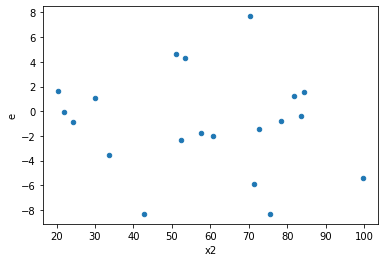

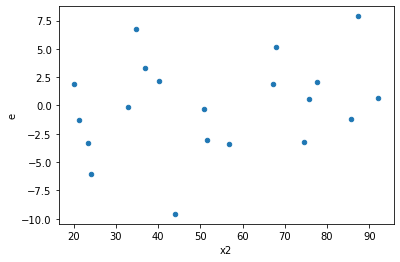

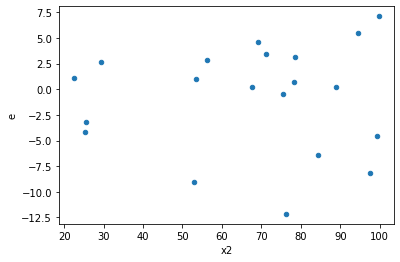

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,5.0,5.0,70.4882013500078,69.7149168292178,17.62205033750195,17.42872920730445,1.011092095579549,0.9906368087623365,0.5046815956188317,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,94.25842140582786,65.81645536310374,23.564605351456965,16.454113840775936,1.4321406536680261,0.703101223852185,0.6484493880739075,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,139.8768791174009,41.72972025992063,34.969219779350226,10.432430064980158,3.3519726048042995,0.21041481889633018,0.8947925905518349,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,69.67991055049417,59.43857716756259,17.419977637623543,14.859644291890648,1.1723011194238442,0.8657698905659437,0.5671150547170282,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,91.16838808754798,51.68155490198052,22.792097021886995,12.92038872549513,1.7640411218365697,0.5484525997398153,0.7257737001300923,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,80.04658909489962,29.79409180424886,20.011647273724904,7.448522951062215,2.6866598123150163,0.30198151719150146,0.8490092414042493,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,97.37507343223223,79.21757314394978,24.343768358058057,19.804393285987445,1.2292105093308987,0.8263662507817586,0.5868168746091207,Reject001=1 : Homoscedasticity
10.0,5.0,5.0,84.58628769927168,79.42346473784747,21.14657192481792,19.855866184461867,1.065003748935722,0.9465864774658468,0.5267067612670766,Reject001=1 : Homoscedasticity
11.0,5.0,5.0,72.53705617953744,7.2464391256656695,18.13426404488436,1.8116097814164174,10.010027673126155,0.02443043287255886,0.9877847835637206,Reject001=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,21.99670700647274,65.08908652498114,5.499176751618185,16.272271631245285,0.33794769877482334,0.25890376978926133,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,70.4882013500078,69.7149168292178,17.62205033750195,17.42872920730445,1.011092095579549,1.0093631912376635,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,86.50221108291014,118.48915455090095,21.625552770727534,29.622288637725237,0.7300432804231904,0.7383107087026329,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,28.8447309919715,30.684966623383275,7.211182747992875,7.671241655845819,0.9400281038595155,0.9475457010824121,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,94.25842140582786,65.81645536310374,23.564605351456965,16.454113840775936,1.4321406536680261,1.296898776147815,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,139.8768791174009,41.72972025992063,34.969219779350226,10.432430064980158,3.3519726048042995,0.21041481889633018,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,69.67991055049417,59.43857716756259,17.419977637623543,14.859644291890648,1.1723011194238442,1.1342301094340563,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,91.16838808754798,51.68155490198052,22.792097021886995,12.92038872549513,1.7640411218365697,1.4515474002601847,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,80.04658909489962,29.79409180424886,20.011647273724904,7.448522951062215,2.6866598123150163,0.30198151719150146,Reject001=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      962
Reject001=0 : Heteroscedasticity     38
Name: Result_test, dtype: int64